In [1]:
import matplotlib.pyplot as plt
import numpy as np

from society.agent import TrainableAgent
from society.simulations import OnlineLearningSimulation
from society.strategies.gameplay.constant import AllC, AllD
from society.strategies.selection.qlearning import QLearningSelectionStrategy
from society.visualisation.network import *

plt.rcParams["figure.figsize"] = (10, 6)

c:\Users\jerem\miniconda3\envs\climatehack\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\jerem\miniconda3\envs\climatehack\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


HELLO tensor([[0.0000, 0.2991, 0.0000, 0.3172, 0.0000]], grad_fn=<ReluBackward0>)
HELLO tensor([[0.2119, 0.2237, 0.0000, 0.1568, 0.0000]], grad_fn=<ReluBackward0>)
HELLO tensor([[56.9672, 30.3356,  0.0000,  2.0428,  0.0000]],
       grad_fn=<ReluBackward0>)
HELLO tensor([[95.1144,  0.0000,  0.0000,  0.0000, 90.4541]],
       grad_fn=<ReluBackward0>)
HELLO tensor([[0.0000, 0.2587, 0.1903, 0.0000, 0.0851]], grad_fn=<ReluBackward0>)
HELLO tensor([[291.1360,  77.4008, 257.9448, 158.9307, 114.4654]],
       grad_fn=<ReluBackward0>)
HELLO tensor([[56.9672, 30.3356,  0.0000,  2.0428,  0.0000]],
       grad_fn=<ReluBackward0>)
HELLO tensor([[0.0000, 5.7212, 0.0000, 0.0000, 0.0000]], grad_fn=<ReluBackward0>)
HELLO tensor([[ 0.0000, 70.5131, 89.0320, 33.5943,  0.0000]],
       grad_fn=<ReluBackward0>)
HELLO tensor([[259.8500,  45.1557, 283.3791, 218.4901,  89.9976]],
       grad_fn=<ReluBackward0>)
HELLO tensor([[ 94.1963, 121.3428,   0.0000,   0.0000,   0.0000]],
       grad_fn=<ReluBackward0>)

c:\Users\jerem\miniconda3\envs\climatehack\lib\site-packages\numpy\core\numeric.py:1211: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  a = asanyarray(a)


tensor([[265.1997,  45.0379, 284.7326, 219.2914,  94.0211]],
       grad_fn=<ReluBackward0>)
HELLO tensor([[ 88.1072, 174.2212,   0.0000,   2.2496,   0.0000]],
       grad_fn=<ReluBackward0>)
HELLO tensor([[146.0175,   0.0000,   0.0000,   0.0000,  96.7854]],
       grad_fn=<ReluBackward0>)
HELLO tensor([[ 0.0000, 14.3382,  0.0000,  0.0000,  0.0000]],
       grad_fn=<ReluBackward0>)
HELLO tensor([[268.1026,  44.9286, 285.3844, 219.7940,  95.6668]],
       grad_fn=<ReluBackward0>)
HELLO tensor([[146.0175,   0.0000,   0.0000,   0.0000,  96.7854]],
       grad_fn=<ReluBackward0>)
HELLO tensor([[ 0.0000, 16.7716,  0.0000,  0.0000,  0.0000]],
       grad_fn=<ReluBackward0>)
HELLO tensor([[ 0.0000, 70.0003, 86.5783, 31.1093,  0.0000]],
       grad_fn=<ReluBackward0>)
HELLO tensor([[271.0649,  44.8013, 286.0195, 220.3314,  97.1631]],
       grad_fn=<ReluBackward0>)
HELLO tensor([[ 88.2994, 182.0817,   0.0000,   2.7775,   0.0000]],
       grad_fn=<ReluBackward0>)
HELLO tensor([[146.0175,   0.00

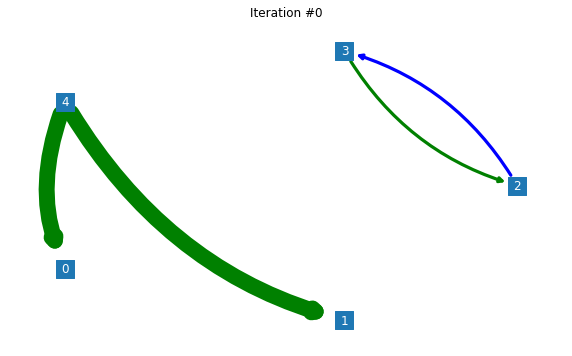

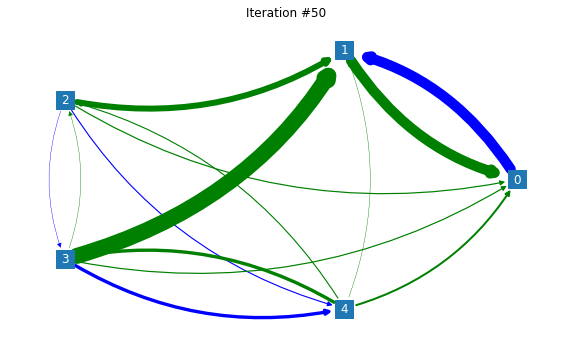

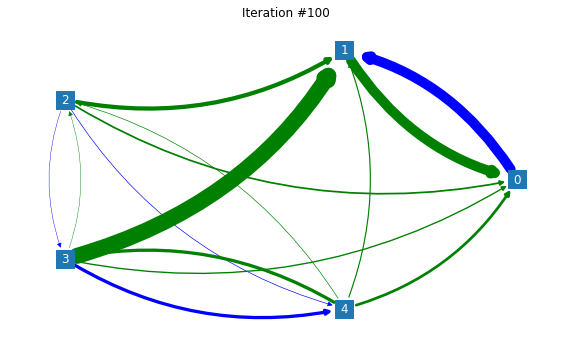

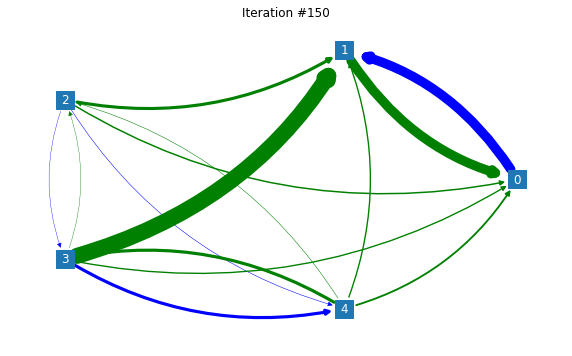

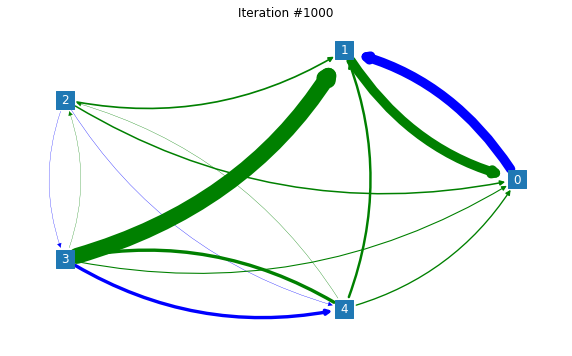

In [2]:
POPULATION = 5

agents = [
    TrainableAgent(QLearningSelectionStrategy(POPULATION), AllC(), 0, POPULATION),                 # 0
    TrainableAgent(QLearningSelectionStrategy(POPULATION), AllC(), 0, POPULATION),                 # 1
    TrainableAgent(QLearningSelectionStrategy(POPULATION), AllD(), 0, POPULATION),                 # 2
    TrainableAgent(QLearningSelectionStrategy(POPULATION), AllD(), 0, POPULATION),                 # 3
    TrainableAgent(QLearningSelectionStrategy(POPULATION), AllD(), 0, POPULATION),                 # 4
]

for agent in agents:
    agent.selection_strategy._epsilon = 0.2

sim = OnlineLearningSimulation(agents)
sim.reset()

for i in range(1001):
    sim.play_round()

    if (i < 200 and i % 50 == 0) or (i >= 200 and i % 1000 == 0):
        plot_graph(make_graph(sim.returns), title=f"Iteration #{i}")


In [3]:
# Returns by agent
print("  ", *[f"{i:<8}" for i in range(POPULATION)])
print("  ", "=" * (9 * POPULATION - 1))
for index, agent in enumerate(sim.returns):
    returns_by_partner = [sum(r) if len(r) > 0 else 0 for r in agent]
    print(
        f"{index}:",
        *[f"{r:<8}" for r in returns_by_partner],
        "=>",
        sum(returns_by_partner),
    )

   0        1        2        3        4       
0: 0        261600   0        0        0        => 261600
1: 261600   0        0        0        0        => 261600
2: 42500    47000    0        8200     9400     => 107100
3: 30500    448500   8200     0        94900    => 582100
4: 37500    68500    9400     94900    0        => 210300


[3, 0, 1, 4, 2]


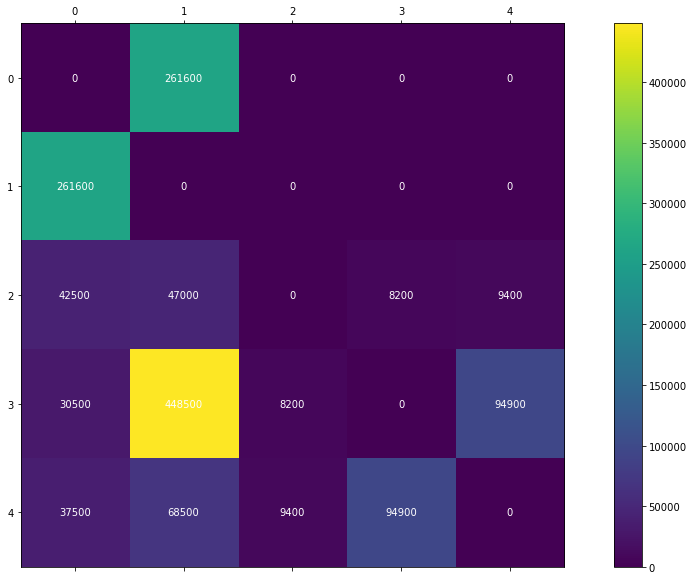

In [4]:
returns_matrix = [[sum(r) if len(r) > 0 else 0 for r in agent] for agent in sim.returns]
ranked_partners = sorted(range(POPULATION), key=lambda i: sum(returns_matrix[i]), reverse=True)
print(ranked_partners)

fig = plt.figure(figsize=(18, 10))
ax = fig.add_subplot(111)
m = ax.matshow(returns_matrix)
fig.colorbar(m)

for (i, j), z in np.ndenumerate(returns_matrix):
    ax.text(
        j,
        i,
        "{:0.0f}".format(z),
        ha="center",
        va="center",
        color="white"
    ) # bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3')


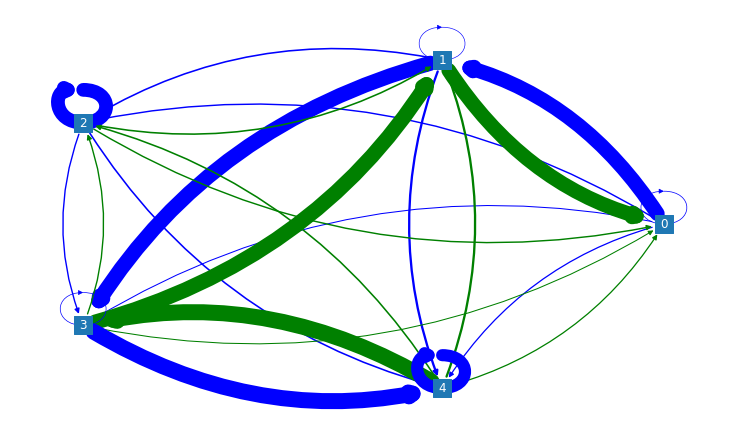

In [5]:
plot_graph(make_frequencies_graph(sim.returns))

In [6]:
# Frequencies by agent
print("  ", *[f"{i:<8}" for i in range(POPULATION)])
print("  ", "=" * (9 * POPULATION - 1))
for index, agent in enumerate(sim.returns):
    frequencies_by_partner = [len(r) if len(r) > 0 else 0 for r in agent]
    print(
        f"{index}:",
        *[f"{r:<8}" for r in frequencies_by_partner],
        "=>",
        sum(frequencies_by_partner),
    )

   0        1        2        3        4       
0: 43       872      85       61       75       => 1136
1: 872      37       94       897      137      => 2037
2: 85       94       817      82       94       => 1172
3: 61       897      82       41       949      => 2030
4: 75       137      94       949      721      => 1976
